In [1]:
import pandas as pd

# Load the CSV file
patients = pd.read_csv("../data/patients.csv")

# Preview the data
patients.head()


,patient_id,first_name,last_name,date_of_birth,sex,race,ethnicity,zip_code
0,1001,John,Doe,4/12/1968,M,White,Non-Hispanic,75201
1,1002,Maria,Lopez,9/30/1975,F,Hispanic,Hispanic,75204
2,1003,James,Smith,1/18/1982,M,Black,Non-Hispanic,75080
3,1004,Linda,Chen,6/5/1990,F,Asian,Non-Hispanic,75024
4,1005,Robert,Johnson,11/22/1959,M,White,Non-Hispanic,75230


In [2]:
# Shape of the dataset
patients.shape


(5, 8)

In [3]:
# Column names
patients.columns


Index(['patient_id', 'first_name', 'last_name', 'date_of_birth', 'sex', 'race',
       'ethnicity', 'zip_code'],
      dtype='object')

In [4]:
# Basic info
patients.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   patient_id     5 non-null      int64 
 1   first_name     5 non-null      object
 2   last_name      5 non-null      object
 3   date_of_birth  5 non-null      object
 4   sex            5 non-null      object
 5   race           5 non-null      object
 6   ethnicity      5 non-null      object
 7   zip_code       5 non-null      int64 
dtypes: int64(2), object(6)
memory usage: 452.0+ bytes


In [5]:
from pathlib import Path
import pandas as pd

DATA_DIR = Path("..") / "data"
patients = pd.read_csv(DATA_DIR / "patients.csv")

patients.head()


,patient_id,first_name,last_name,date_of_birth,sex,race,ethnicity,zip_code
0,1001,John,Doe,4/12/1968,M,White,Non-Hispanic,75201
1,1002,Maria,Lopez,9/30/1975,F,Hispanic,Hispanic,75204
2,1003,James,Smith,1/18/1982,M,Black,Non-Hispanic,75080
3,1004,Linda,Chen,6/5/1990,F,Asian,Non-Hispanic,75024
4,1005,Robert,Johnson,11/22/1959,M,White,Non-Hispanic,75230


In [1]:
from sqlalchemy import create_engine
import pandas as pd


In [2]:
engine = create_engine(
    "postgresql+psycopg2://hi5304_user:hi5304_password@db:5432/hi5304"
)


In [3]:
query = """
SELECT *
FROM hi5304.patients
LIMIT 5;
"""

df_patients = pd.read_sql(query, engine)
df_patients


,patient_id,first_name,last_name,date_of_birth,sex,race,ethnicity,zip_code
0,1001,John,Doe,1968-04-12,M,White,Non-Hispanic,75201
1,1002,Maria,Lopez,1975-09-30,F,Hispanic,Hispanic,75204
2,1003,James,Smith,1982-01-18,M,Black,Non-Hispanic,75080
3,1004,Linda,Chen,1990-06-05,F,Asian,Non-Hispanic,75024
4,1005,Robert,Johnson,1959-11-22,M,White,Non-Hispanic,75230


In [4]:
query = """
SELECT
    p.patient_id,
    p.first_name,
    p.last_name,
    b.reading_date,
    b.systolic,
    b.diastolic,
    b.heart_rate
FROM hi5304.patients p
JOIN hi5304.bp_readings b
  ON p.patient_id = b.patient_id
ORDER BY b.reading_date;
"""

df_bp = pd.read_sql(query, engine)
df_bp.head()


,patient_id,first_name,last_name,reading_date,systolic,diastolic,heart_rate
0,1001,John,Doe,2024-09-01,148,92,78
1,1005,Robert,Johnson,2024-09-05,140,90,75
2,1003,James,Smith,2024-09-10,150,96,82
3,1002,Maria,Lopez,2024-09-15,132,82,70
4,1004,Linda,Chen,2024-09-20,118,76,66


In [5]:
query = """
SELECT
    patient_id,
    COUNT(*) AS medication_count
FROM hi5304.medications
GROUP BY patient_id
ORDER BY medication_count DESC;
"""

df_meds = pd.read_sql(query, engine)
df_meds


,patient_id,medication_count
0,1003,2
1,1002,1
2,1001,1
3,1005,1


In [6]:
query = """
SELECT
    AVG(systolic) AS avg_systolic,
    AVG(diastolic) AS avg_diastolic,
    COUNT(*) AS total_readings
FROM hi5304.bp_readings;
"""

df_summary = pd.read_sql(query, engine)
df_summary


,avg_systolic,avg_diastolic,total_readings
0,137.777778,86.888889,9


In [7]:
df_bp.describe()


,patient_id,systolic,diastolic,heart_rate
count,9.000000,9.000000,9.000000,9.000000
mean,1002.444444,137.777778,86.888889,74.333333
std,1.424001,10.413666,6.790516,5.431390
min,1001.000000,118.000000,76.000000,66.000000
25%,1001.000000,132.000000,82.000000,70.000000
50%,1002.000000,140.000000,88.000000,75.000000
75%,1003.000000,146.000000,92.000000,78.000000
max,1005.000000,150.000000,96.000000,82.000000


In [ ]:
df_bp.groupby("patient_id")[["systolic", "diastolic"]].mean()


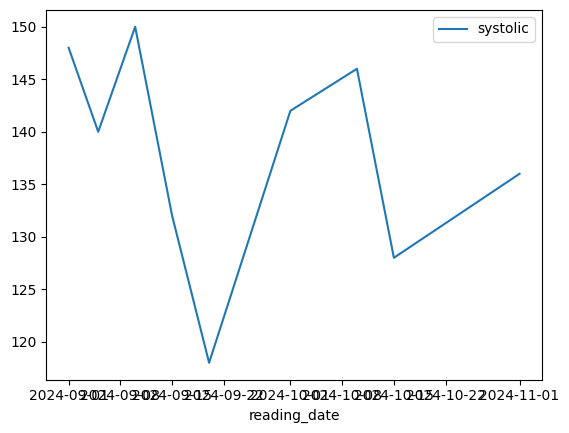

In [8]:
import matplotlib.pyplot as plt

df_bp.plot(x="reading_date", y="systolic", kind="line")
plt.show()
